<a href="https://colab.research.google.com/github/jairoespinosa/COVID19/blob/master/Calculo_De_R0_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis diario de la epidemia COVID 19 en Colombia 

Preparado por:

Jairo Espinosa

Profesor Universidad Nacional de Colombia-Sede Medellín

Grupo GAUNAL

Laboratorio de Gestión de Sistemas en Tiempo Real

Correo electrónico: jespinov@unal.edu.co

Twitter: @jairojespinosa

In [1]:
!pip install -q bokeh==1.3.4

     |████████████████████████████████| 17.8MB 223kB/s 


In [0]:
#@title 
from scipy.integrate import odeint
import datetime as datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sgnl
# Bokeh libraries
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

data = pd.read_json('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=5000')




data_Hosp = np.array([['Departamento','Adultos','Pediátrica','Cuidado Intensivo Adulto','Cuidado Intensivo Pediátrico','Cuidado Intermedio Adulto','Cuidado Intermedio Pediátrico','Total general'],
['Amazonas', 68, 35, 0, 0, 8, 3, 114],
['Antioquia', 5383, 1173 , 509, 67, 471, 50, 7653],
['Arauca', 156, 70, 4, 0, 8,0, 238],
['Atlántico', 3043, 645, 498, 108, 350, 84, 4728],
['Bogotá D.C', 6517   , 1766   , 967   , 206   , 576   , 102   , 10134   ],
['Bolívar', 1662   , 366   , 234   , 55   , 136   , 34   , 2487   ],
['Boyacá', 784   , 190   , 80   , 10   , 35   , 2   , 1101   ],
['Caldas', 1054   , 219   , 136   , 10   , 113   , 11   , 1543],   
['Caquetá', 266   , 106   , 20   , 0     , 2   , 0     , 394  ], 
['Casanare', 285   , 92   , 17   , 2   , 23   , 2   , 421   ],
['Cauca', 676   , 214   , 84   , 19   , 50   , 9   , 1052   ],
['Cesar', 1305   , 480   , 207   , 36   , 97   , 25   , 2150   ],
['Chocó', 358   , 189   , 27   ,0, 22   , 0     , 596   ],
['Córdoba', 1193   , 442   , 195   , 47   , 75   , 61   , 2013   ],
['Cundinamarca', 1.449   , 404   , 168   , 13   , 151   , 6   , 2191   ],
['Guainía', 16   , 15   ,0,0,0,0, 31   ],
['Guaviare', 64   , 28   ,0,0, 0     ,0, 92   ],
['Huila', 892   , 228   , 140   , 24   , 36   , 9   , 1329   ],
['La Guajira', 539   , 303   , 78   , 24   , 32   , 19   , 995   ],
['Magdalena', 1218   , 351   , 97   , 19   , 63   , 16   , 1764   ],
['Meta', 718   , 178   , 67   , 6   , 51   , 4   , 1024   ],
['Nariño', 1092   , 263   , 132   , 16   , 50   , 5   , 1558   ],
['Norte de Santander', 961   , 252   , 141   , 28   , 61   , 13   , 1456   ],
['Putumayo', 174   , 80   , 10   , 0     , 3   , 0     , 267 ],  
['Quindío', 639   , 80   , 49   , 1   , 24   , 1   , 794   ],
['Risaralda', 1003   , 135   , 90   , 13   , 100   , 15   , 1356   ],
['San Andrés y Providencia', 65   , 15   , 5   ,0, 3,0, 88   ],
['Santander', 1991   , 484   , 251   , 56   , 124   , 33   , 2939   ],
['Sucre', 904   , 343   , 159   , 30   , 43   , 11   , 1490   ],
['Tolima', 1134   , 231   , 215   , 15   , 115   , 9   , 1719   ],
['Valle del cauca', 4315   , 738   , 766   , 91   , 338   , 38   , 6286   ],
['Vaupés', 5   , 5   ,0,0,0,0, 10   ],
['Vichada', 39   , 24   , 0     , 0     , 1   , 1   , 65   ]])

#dicrt=np.array([['Amazonas', 'Antioquia','Arauca','Atlántico','Barranquilla D.E.','Bogotá D.C.','Bolívar', 'Boyacá','Buenaventura D.E.','Caldas','Caquetá','Cartagena D.T. y C','Casanare', 'Cauca','Cesar','Chocó','Córdoba','Cundinamarca','Guainía','Guaviare','Huila','La Guajira','Magdalena', 'Meta','Nariño','Norte de Santander','Putumayo','Quindí­o','Risaralda','San Andrés', 'Santa Marta D.T. y C.','Santander','Sucre','Tolima','Valle del Cauca','Vaupés','Vichada'],
#['Amazonas', 'Antioquia','Arauca','Atlántico','Atlántico','Bogotá D.C','Bolívar','Boyacá','Valle del cauca','Caldas','Caquetá', 'Bolívar','Casanare', 'Cauca','Cesar','Chocó','Córdoba','Cundinamarca','Guainía', 'Guaviare', 'Huila','La Guajira','Magdalena','Meta','Nariño','Norte de Santander','Putumayo', 'Quindío','Risaralda','San Andrés y Providencia', 'Magdalena','Santander','Sucre','Tolima','Valle del cauca','Vaupés','Vichada']])
      
df_HospCapacity = pd.DataFrame(data=data_Hosp[1:,1:],index=data_Hosp[1:,0],columns=data_Hosp[0,1:])

In [3]:
data.head()

,id_de_caso,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


Fecha y hora del Reporte : 
2020-04-23 00:45:39 UTC
En departamento de Huila hay: 
Casos Positivos = 81
Casos Importados  = 9
Casos Relacionados/en Estudio  = 72
Recuperados = 26
En Casa = 39
Hospitalizados = 7
Hospitalizados/UCI = 4
Fallecidos = 5



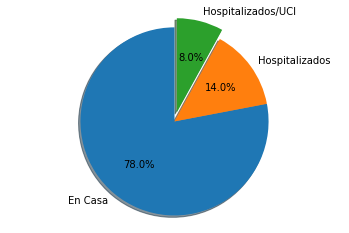

Reporte diario de contagio basado en fecha de inicio de síntomas


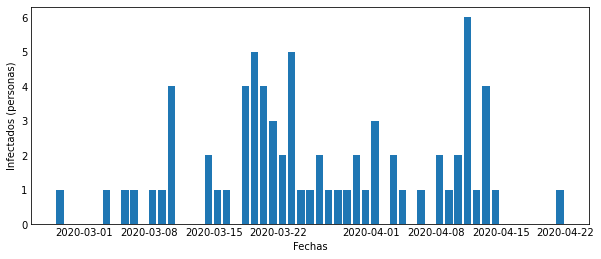

Curva acumulada de contagios


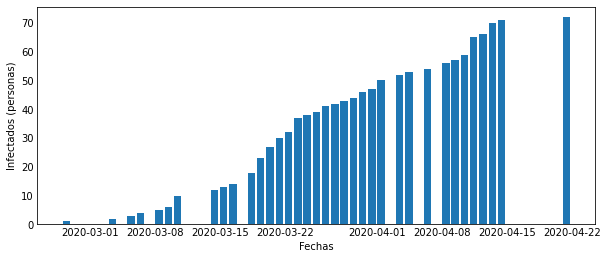

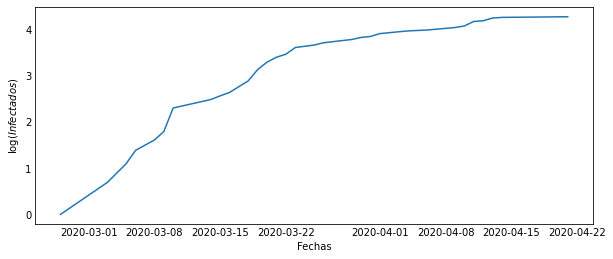

Visualización del R_t tasa de contagio


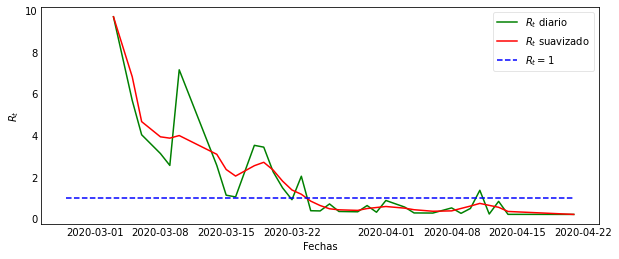

In [10]:
#@title Nombre del Departamento a Consultar { run: "auto" }



Departamento = "Huila"  #@param ['Amazonas', 'Antioquia','Atlántico','Barranquilla D.E.','Bogotá D.C.','Bolívar', 'Boyacá','Buenaventura D.E.','Caldas','Caquetá','Cartagena D.T. y C','Casanare', 'Cauca','Cesar','Córdoba','Cundinamarca','Chocó','Huila','La Guajira','Magdalena', 'Meta','Nariño','Norte de Santander','Quindí­o','Risaralda','San Andrés', 'Santa Marta D.T. y C.','Santander','Sucre','Tolima','Valle del Cauca']

now = datetime.datetime.now()
print('Fecha y hora del Reporte : ')
print(now.strftime('%Y-%m-%d %H:%M:%S')+' UTC')

if Departamento == 'Colombia':
  print('En Colombia hay: ')
  select_department = data
  select_department_tipo_Imp = data.loc[(data['tipo']=='Importado')]
  select_department_tipo = data.loc[(data['tipo']!='Importado')]
  select_department_fallec = data.loc[(data['atenci_n'] =='Fallecido')]
  select_department_recup = data.loc[(data['atenci_n'] =='Recuperado')]
  select_department_hospit = data.loc[(data['atenci_n'] =='Hospital')]
  select_department_UCI = data.loc[(data['atenci_n'] =='Hospital UCI')]
  select_department_En_Casa = data.loc[(data['atenci_n'] =='Casa')]
else:
  select_department = data.loc[data['departamento'] == Departamento]
  select_department_tipo_Imp = data.loc[(data['departamento'] == Departamento) & (data['tipo']=='Importado')]
  select_department_tipo = data.loc[(data['departamento'] == Departamento) & (data['tipo']!='Importado')]
  select_department_fallec = data.loc[(data['departamento'] == Departamento) & (data['atenci_n'] =='Fallecido')]
  select_department_recup = data.loc[(data['departamento'] == Departamento) & (data['atenci_n'] =='Recuperado')]
  select_department_hospit = data.loc[(data['departamento'] == Departamento) & (data['atenci_n'] =='Hospital')]
  select_department_UCI = data.loc[(data['departamento'] == Departamento) & (data['atenci_n'] =='Hospital UCI')]
  select_department_En_Casa = data.loc[(data['departamento'] == Departamento) & (data['atenci_n'] =='Casa')]
  print('En departamento de ' + Departamento + ' hay: ')

print('Casos Positivos = ' + str(select_department.shape[0]))
print('Casos Importados  = ' + str(select_department_tipo_Imp.shape[0]))
print('Casos Relacionados/en Estudio  = ' + str(select_department_tipo.shape[0]))
print('Recuperados = ' + str(select_department_recup.shape[0]))
print('En Casa = ' + str(select_department_En_Casa.shape[0]))
print('Hospitalizados = ' + str(select_department_hospit.shape[0]))
print('Hospitalizados/UCI = ' + str(select_department_UCI.shape[0]))
print('Fallecidos = ' + str(select_department_fallec.shape[0]))
print()
dates_diaf = data.loc[(data['fis'] =='Asintomático')].to_numpy()
if dates_diaf.size>0 :
  data.loc[(data['fis'] =='Asintomático'),['fis']] = dates_diaf[:,1]
  data.fis = pd.to_datetime(data.fis)

df = select_department_tipo.groupby(by='fis').count()
df_array = df.to_numpy()
NI_infected_cases = df_array[:,0]
Total_NI_infected_cases = np.cumsum(NI_infected_cases,0)
time_vector = pd.to_datetime(df.index)
#time_vector = datetime(df.index.to_numpy()).fromisoformat()
tv = (time_vector-time_vector[0])
cumulcases = Total_NI_infected_cases-Total_NI_infected_cases[0]+1



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'En Casa', 'Hospitalizados', 'Hospitalizados/UCI'
sizes = [select_department_En_Casa.shape[0], select_department_hospit.shape[0], select_department_UCI.shape[0]]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'UCI')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print('Reporte diario de contagio basado en fecha de inicio de síntomas')
f, ax = plt.subplots(1,1,figsize=(10,4))
ax.bar(time_vector.date,NI_infected_cases,align='edge')
ax.set_xlabel('Fechas')
ax.set_ylabel('Infectados (personas)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(True)
plt.show();
print('Curva acumulada de contagios')
f, ax = plt.subplots(1,1,figsize=(10,4))
ax.bar(time_vector.date,cumulcases,align='edge')
ax.set_xlabel('Fechas')
ax.set_ylabel('Infectados (personas)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(True)
plt.show();


f, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(time_vector.date,np.log(cumulcases))
ax.set_xlabel('Fechas')
ax.set_ylabel('$\log(Infectados)$')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(True)
plt.show();
Rtraw = 14.0*np.diff(np.log(cumulcases))
Rfilt = sgnl.filtfilt([0.3333, 0.3333, 0.3333],[1.0],Rtraw)
print('Visualización del R_t tasa de contagio')
f, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(time_vector.date[1:],Rtraw,color='green',label='$R_t$ diario')
ax.plot(time_vector.date[1:],Rfilt,color='red',label='$R_t$ suavizado')
ax.plot([time_vector.date[0],time_vector.date[-1]], [1,1 ],'b--',label='$R_t=1$')
ax.set_xlabel('Fechas')
ax.set_ylabel('$R_t$')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(True)
plt.show();
#@markdown ---